In [1]:
# This script provides some reporting on the resolver data from identifiers.org
#
# Author: Manuel Bernal Llinares <mbdebian@gmail.com>

In [23]:
import time
import random
import pandas
import requests
import threading
import numpy as np
import multiprocessing
import matplotlib.pyplot as plt
from collections import Counter
from multiprocessing.pool import ThreadPool

%matplotlib inline

In [3]:
# Endpoint from where the information is coming
identifiersorg_resolver_data_url = "https://identifiers.org/rest/collections/expand"
metadata_service_endpoint_from_url = "http://localhost:8082/getMetadataForUrl"

In [4]:
# Initialize pseudo-random number generator
random.seed(time.time())

In [5]:
# Helpers
def make_rest_request_content_type_json(url):
    # TODO - Magic number here!!!
    n_attempts = 42
    response = None
    while n_attempts:
        n_attempts -= 1
        try:
            response = requests.get(url, headers={"Content-Type": "application/json"})
        except Exception as e:
            # Any possible exception counts towards the attempt counter
            # Random wait - TODO - Another magic number!!!
            time.sleep(random.randint(30))
            continue
        if response.ok:
            return response.json()
        # Random wait - TODO - Another magic number!!!
        time.sleep(random.randint(10))
    response.raise_for_status()

In [6]:
def get_metadata_for_url(url):
    """
    This Helper queries the metadata service with a URL, 
    and returns its response back to the caller for further interpretation
    """
    n_attempts = 42
    response = None
    while n_attempts:
        n_attempts -= 1
        try:
            response = requests.post(metadata_service_endpoint_from_url, json={"url": url})
        except Exception as e:
            # Any possible exception counts towards the attempt counter
            # Random wait - TODO - Another magic number!!!
            time.sleep(random.randint(3))
            continue
        if response.ok:
            print("[METADATA][OK] - '{}'".format(url))
            break
        else:
            print("[METADATA][ERROR] - '{}'".format(url))
            break
        # Random wait - TODO - Another magic number!!!
    return response

In [7]:
# Get the resolver data
resolver_dump = make_rest_request_content_type_json(identifiersorg_resolver_data_url)

In [8]:
# Workout how many prefixes there are in identifiers.org
prefixes = [pid_entry['prefix'] for pid_entry in resolver_dump]

In [9]:
prefixes

['chebi',
 'ensembl',
 'ec-code',
 'uniprot',
 'taxonomy',
 'biomodels.db',
 'miriam.collection',
 'icd',
 'intact',
 'interpro',
 'kegg.pathway',
 'kegg.compound',
 'kegg.reaction',
 'pubmed',
 'omim',
 'pirsf',
 'reactome',
 'doi',
 'pdb',
 'go',
 'sgd',
 'sbo',
 'kegg.drug',
 'kegg.glycan',
 'wormbase',
 'pfam',
 'insdc',
 'flybase',
 'wormpep',
 'prosite',
 'pubchem.substance',
 'pubchem.compound',
 'arxiv',
 'arrayexpress',
 'mgi',
 'sabiork.reaction',
 'refseq',
 'tcdb',
 'uniparc',
 'mint',
 'dip',
 'signaling-gateway',
 'resid',
 'rgd',
 'tair.protein',
 'tair.gene',
 'tair.locus',
 'hmdb',
 'lipidmaps',
 'peptideatlas',
 'geo',
 'eco',
 'mod',
 'sgd.pathways',
 'biogrid',
 'merops',
 'panther.family',
 'prints',
 'ligandexpo',
 'aclame',
 'isbn',
 'pride',
 '3dmet',
 'fma',
 'matrixdb.association',
 'ncbigene',
 'kegg.genes',
 'brenda',
 'pubchem.bioassay',
 'pathwaycommons',
 'hovergen',
 'mmmp:biomaps',
 'wikipathways',
 'macie',
 'mirbase',
 'zfin',
 'hgnc',
 'so',
 'rhea',

In [10]:
print("There are #{} Compact ID prefixes registered in identifiers.org".format(len(prefixes)))

There are #629 Compact ID prefixes registered in identifiers.org


In [11]:
# Check the distribution of resources
resource_prefixes = []
for pid_entry in resolver_dump:
    if 'resources' in pid_entry:
        for resource in pid_entry['resources']:
            if 'resourcePrefix' in resource:
                resource_prefixes.append(resource['resourcePrefix'])
            else:
                print("NO RESOURCE PREFIX FOR: PID Entry Name '{}', Resource Information '{}'".format(pid_entry['name'], resource['info']))


NO RESOURCE PREFIX FOR: PID Entry Name 'Ensembl', Resource Information 'Ensembl US West mirror'
NO RESOURCE PREFIX FOR: PID Entry Name 'Ensembl', Resource Information 'Ensembl US East mirror'
NO RESOURCE PREFIX FOR: PID Entry Name 'Ensembl', Resource Information 'Ensembl Asia mirror'
NO RESOURCE PREFIX FOR: PID Entry Name 'Enzyme Nomenclature', Resource Information 'KEGG Ligand Database for Enzyme Nomenclature'
NO RESOURCE PREFIX FOR: PID Entry Name 'UniProt Knowledgebase', Resource Information 'Universal Protein Resource using Persistent URL system'
NO RESOURCE PREFIX FOR: PID Entry Name 'Taxonomy', Resource Information 'Taxonomy through UniProt PURL'
NO RESOURCE PREFIX FOR: PID Entry Name 'Taxonomy', Resource Information 'Bio2RDF'
NO RESOURCE PREFIX FOR: PID Entry Name 'BioModels Database', Resource Information 'Caltech mirror'
NO RESOURCE PREFIX FOR: PID Entry Name 'BioModels Database', Resource Information 'Bio2RDF'
NO RESOURCE PREFIX FOR: PID Entry Name 'ICD', Resource Information

In [12]:
resource_prefixes

['ebi',
 'ols',
 'bptl',
 'ebi',
 'intenz',
 'expasy',
 'expenz',
 'enzymeportal',
 'ncbi',
 'ncbi',
 'ebi',
 'bptl',
 'ols',
 'ebi',
 'ebi',
 'ebi',
 'ebi',
 'ncbi',
 'hubmed',
 'epmc',
 'rcsb',
 'pdbe',
 'pdbj',
 'ebi',
 'quickgo',
 'amigo',
 'bptl',
 'ols',
 'ebi',
 'ols',
 'bptl',
 'ebi',
 'ebi',
 'ncbi',
 'expasy',
 'ncbi',
 'ncbi',
 'ebi',
 'ncbi',
 'ebi',
 'ebi',
 'ncbi',
 'ols',
 'bptl',
 'ols',
 'bptl',
 'rcsb',
 'ebi',
 'ols',
 'bptl',
 'ncbi',
 'ncbi',
 'ebi',
 'ebi',
 'bptl',
 'ols',
 'ebi',
 'ebi',
 'ebi',
 'ncbi',
 'bptl',
 'ols',
 'bptl',
 'ols',
 'ols',
 'ols',
 'bptl',
 'ols',
 'bptl',
 'ols',
 'bptl',
 'ebi',
 'ncbi',
 'ols',
 'ebi',
 'ebi',
 'bptl',
 'bptl',
 'ols',
 'bptl',
 'ols',
 'bptl',
 'ebi',
 'bptl',
 'ols',
 'ebi',
 'ncbi',
 'epmc',
 'cpmc',
 'ncbi',
 'ebi',
 'ncbi',
 'ncbi',
 'ncbi',
 'bptl',
 'ebi',
 'bptl',
 'ols',
 'quickgo',
 'ebi',
 'ebi',
 'ebi',
 'ebi',
 'ebi',
 'ncbi',
 'ebi',
 'bptl',
 'ols',
 'ols',
 'ols',
 'bptl',
 'ncbi',
 'ebi',
 'ebi',
 'ncbi

In [13]:
resource_prefixes_distribution = Counter(resource_prefixes)

In [14]:
resource_prefixes_distribution

Counter({'amigo': 2,
         'bptl': 34,
         'cpmc': 1,
         'ebi': 56,
         'enzymeportal': 1,
         'epmc': 2,
         'expasy': 2,
         'expenz': 1,
         'hubmed': 1,
         'intenz': 1,
         'ncbi': 33,
         'ols': 39,
         'pdbe': 1,
         'pdbj': 1,
         'quickgo': 2,
         'rcsb': 3,
         'sib': 1})

In [15]:
print("There #{} Resource Selectors in identifiers.org".format(len(resource_prefixes_distribution.keys())))

There #17 Resource Selectors in identifiers.org


In [16]:
labels = sorted(resource_prefixes_distribution.keys())
values = [resource_prefixes_distribution.get(key) for key in labels]

TypeError: unsupported operand type(s) for -: 'str' and 'float'

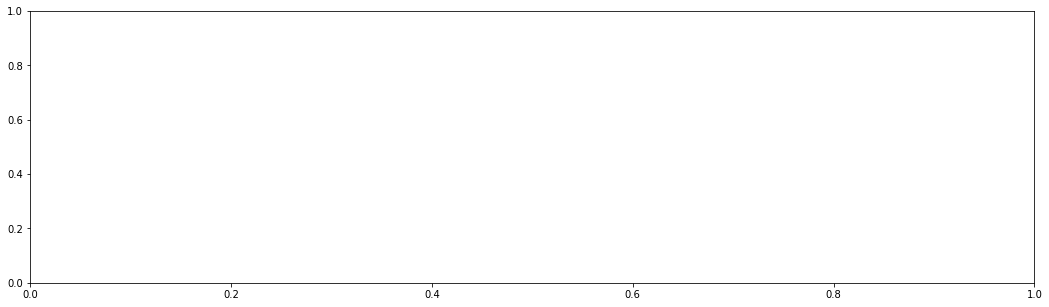

In [17]:
# I don't like this Pie Chart
fig1, ax1 = plt.subplots()
fig1.set_size_inches(18, 5)
ax1.bar(labels, values, 1/1.5, color="blue")
#ax1.pie(values, labels=labels, shadow=True, startangle=90)
#ax1.axis('equal')
plt.show()

In [18]:
# Create a report on metadata
columns = ['PidEntryName',
           'PidEntryPrefix',
           'PidEntryUrl', 
           'ResourceInfo', 
           'ResourceInstitution', 
           'ResourceLocation', 
           'ResourceOfficial', 
           'ResourcePrefix', 
           'ResourceLocalId', 
           'WasMetadataFound', 
           'MetadataContent', 
           'ResourceTestUrl', 
           'MetadataServiceResponseStatus', 
           'MetadataServiceResponseError']
metadata_report = pandas.DataFrame(columns=columns)

In [19]:
# Prepare the URLs and initial report (I could have done everything in one pass, but this is just investigating the dataset)
for pid_entry in resolver_dump:
    entry = pandas.Series(['---'] * len(columns), index=columns)
    entry.PidEntryName = pid_entry['name']
    entry.PidEntryPrefix = pid_entry['prefix']
    entry.PidEntryUrl = pid_entry['url']
    if ('resources' not in pid_entry) or (not pid_entry['resources']):
        metadata_report = metadata_report.append(entry, ignore_index=True)
    for resource in pid_entry['resources']:
        resource_entry = entry.copy()
        resource_entry.ResourceInfo = resource['info']
        resource_entry.ResourceInstitution = resource.get('institution', '---')
        resource_entry.ResourceLocation = resource.get('location', '---')
        resource_entry.ResourceOfficial = resource.get('official', '---')
        resource_entry.ResourcePrefix = resource.get('resourcePrefix', '---')
        resource_entry.ResourceLocalId = resource.get('localId', '---')
        resource_entry.WasMetadataFound = 'No'
        resource_entry.ResourceTestUrl = None
        if ('accessURL' in resource) and ('localId' in resource):
            resource_entry.ResourceTestUrl = resource['accessURL'].replace('{$id}', resource['localId'])
        metadata_report = metadata_report.append(resource_entry, ignore_index=True)        

In [20]:
metadata_report.ResourceTestUrl.describe()

count                                     761
unique                                    760
top       http://zfin.org/ZDB-GENO-980202-899
freq                                        2
Name: ResourceTestUrl, dtype: object

In [21]:
metadata_report.head()

,PidEntryName,PidEntryPrefix,PidEntryUrl,ResourceInfo,ResourceInstitution,ResourceLocation,ResourceOfficial,ResourcePrefix,ResourceLocalId,WasMetadataFound,MetadataContent,ResourceTestUrl,MetadataServiceResponseStatus,MetadataServiceResponseError
0,ChEBI,chebi,http://identifiers.org/chebi,ChEBI (Chemical Entities of Biological Interest),"European Bioinformatics Institute, Hinxton, Ca...",UK,True,ebi,36927,No,---,http://www.ebi.ac.uk/chebi/searchId.do?chebiId...,---,---
1,ChEBI,chebi,http://identifiers.org/chebi,ChEBI through OLS,"European Bioinformatics Institute, Hinxton, Ca...",UK,False,ols,36927,No,---,http://www.ebi.ac.uk/ols/ontologies/chebi/term...,---,---
2,ChEBI,chebi,http://identifiers.org/chebi,ChEBI through BioPortal,"National Center for Biomedical Ontology, Stanford",USA,False,bptl,36927,No,---,http://purl.bioontology.org/ontology/CHEBI/CHE...,---,---
3,Ensembl,ensembl,http://identifiers.org/ensembl,Ensembl at Sanger/EMBL-EBI,Sanger Institute and European Bioinformatics I...,UK,True,ebi,ENSG00000139618,No,---,http://www.ensembl.org/id/ENSG00000139618,---,---
4,Ensembl,ensembl,http://identifiers.org/ensembl,Ensembl US West mirror,---,USA,False,---,ENSG00000139618,No,---,http://uswest.ensembl.org/id/ENSG00000139618,---,---


In [24]:
# Parallel call to metadata service, this is a lot slower, good enough as proof of concept
#metadata_requests = {index: threading.Thread(target=get_metadata_for_url(metadata_report.loc[index].ResourceTestUrl)) for index in range(metadata_report.shape[0]) if metadata_report.loc[index].ResourceTestUrl}

# Parallel wrapper - Version using multiprocessing, it crashes within Jupyter
#def metadata_request_parallel_wrapper(context, url):
#    context.put(get_metadata_for_url(url))
#metadata_requests = {index: multiprocessing.Process(target=metadata_request_parallel_wrapper, args=(multiprocessing.Queue(), metadata_report.loc[index].ResourceTestUrl),) for index in range(metadata_report.shape[0]) if metadata_report.loc[index].ResourceTestUrl}
#metadata_requests = {index: multiprocessing.Process(target=get_metadata_for_url, args=(metadata_report.loc[index].ResourceTestUrl,)) for index in range(metadata_report.shape[0]) if metadata_report.loc[index].ResourceTestUrl}
#[process.start() for process in metadata_requests.values()]

# Another approach, with Thread Pool
pool = ThreadPool(processes=multiprocessing.cpu_count() * 4)
metadata_requests = {index: pool.apply_async(get_metadata_for_url, (metadata_report.loc[index].ResourceTestUrl)) 
                     for index in range(metadata_report.shape[0]) 
                     if metadata_report.loc[index].ResourceTestUrl}

In [25]:
len(metadata_requests)

761

In [ ]:
pool.